<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [158]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [159]:
import pyupbit

In [160]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("Krw-link", interval="minute15")
df

,open,high,low,close,volume,value
2022-09-16 09:00:00,10610.0,10650.0,10550.0,10560.0,21089.924390,2.235814e+08
2022-09-16 09:15:00,10570.0,10800.0,10480.0,10760.0,49812.565361,5.319946e+08
2022-09-16 09:30:00,10760.0,10770.0,10570.0,10620.0,36082.159457,3.848704e+08
2022-09-16 09:45:00,10610.0,10730.0,10600.0,10720.0,16883.820632,1.801076e+08
2022-09-16 10:00:00,10720.0,10720.0,10650.0,10680.0,11426.778783,1.221129e+08
...,...,...,...,...,...,...
2022-09-18 09:45:00,11210.0,11280.0,11180.0,11260.0,15550.195436,1.744458e+08
2022-09-18 10:00:00,11240.0,11330.0,11210.0,11210.0,13335.705294,1.501016e+08
2022-09-18 10:15:00,11220.0,11320.0,11200.0,11300.0,21639.013984,2.439742e+08
2022-09-18 10:30:00,11290.0,11310.0,11200.0,11230.0,25893.170733,2.909388e+08


In [161]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-09-16 09:00:00,10560.0
1,2022-09-16 09:15:00,10760.0
2,2022-09-16 09:30:00,10620.0
3,2022-09-16 09:45:00,10720.0
4,2022-09-16 10:00:00,10680.0
...,...,...
195,2022-09-18 09:45:00,11260.0
196,2022-09-18 10:00:00,11210.0
197,2022-09-18 10:15:00,11300.0
198,2022-09-18 10:30:00,11230.0


In [162]:
#prophet 불러옴
from fbprophet import Prophet

In [163]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [164]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

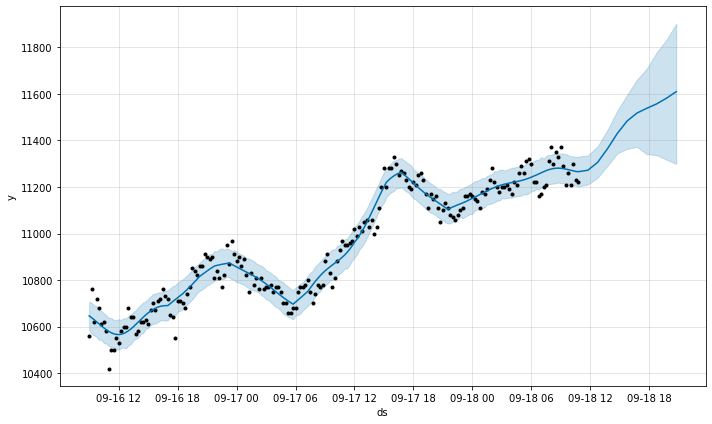

In [165]:
#그래프1
fig1 = model.plot(forecast)

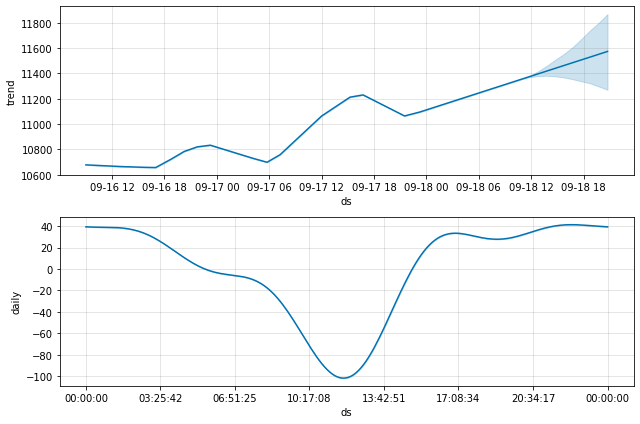

In [166]:
 #그래프2
fig2 = model.plot_components(forecast)